In [1]:
import tensorflow as tf
from tensorflow import keras
import splitfolders
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
# Verificar dispositivos disponibles
print("Dispositivos disponibles:")
print(tf.config.list_physical_devices())

# Verificar si TensorFlow está utilizando la GPU
print("TensorFlow está utilizando GPU:")
print(tf.test.is_gpu_available())

Dispositivos disponibles:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TensorFlow está utilizando GPU:
False


In [16]:
folder_path = 'images/'
train_Butterfly_dir = os.path.join('images/Butterfly')
train_Dragonfly_dir = os.path.join('images/Dragonfly')
train_Grasshopper_dir = os.path.join('images/Grasshopper')
train_Ladybird_dir = os.path.join('images/Ladybird')
train_Mosquito_dir = os.path.join('images/Mosquito')

In [12]:
# just checking the file name
train_Butterfly_names = os.listdir(train_Butterfly_dir)
train_Dragonfly_names = os.listdir(train_Butterfly_dir)
train_Grasshopper_names = os.listdir(train_Grasshopper_dir)
train_Ladybird_names = os.listdir(train_Ladybird_dir)
train_Mosquito_names = os.listdir(train_Mosquito_dir)
print(train_Butterfly_names[:10])

['google0.jpg', 'google1.jpg', 'google10.jpg', 'google100.jpg', 'google101.jpg', 'google102.jpg', 'google103.jpg', 'google104.jpg', 'google105.jpg', 'google107.jpg']


In [13]:
print('total training Butterfly images:', len(os.listdir(train_Butterfly_dir)))
print('total training Dragonfly images:', len(os.listdir(train_Dragonfly_dir)))
print('total training Grasshopper images:', len(os.listdir(train_Grasshopper_dir)))
print('total training Ladybird images:', len(os.listdir(train_Ladybird_dir)))
print('total training Mosquito images:', len(os.listdir(train_Mosquito_dir)))

total training Butterfly images: 899
total training Dragonfly images: 1036
total training Grasshopper images: 960
total training Ladybird images: 864
total training Mosquito images: 690


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

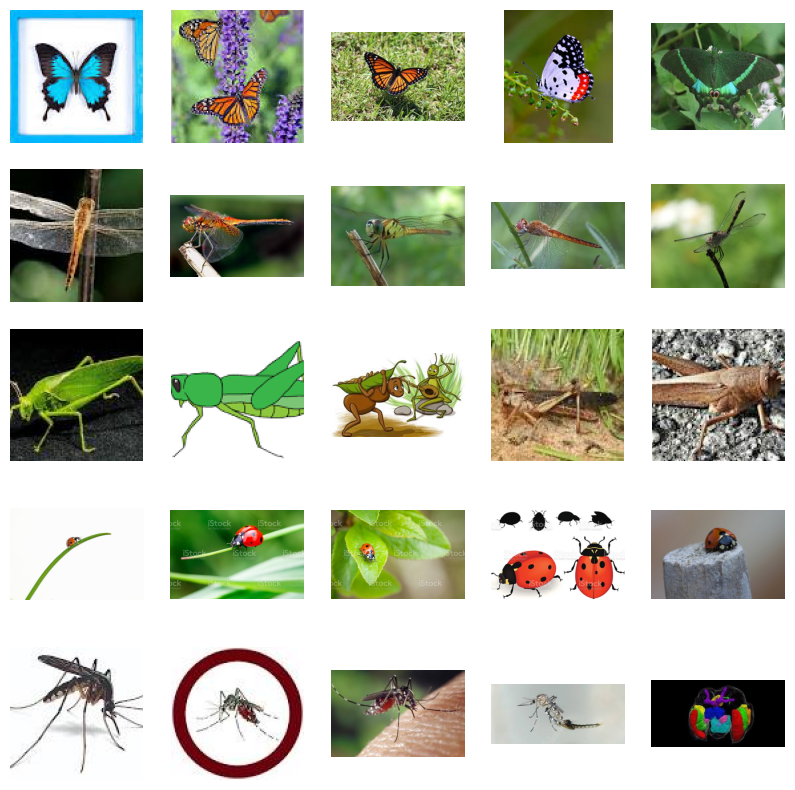

In [15]:
# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 5
next_Butterfly_pix = [os.path.join(train_Butterfly_dir, fname)
                for fname in train_Butterfly_names[pic_index-5:pic_index]]
next_Dragonfly_pix = [os.path.join(train_Dragonfly_dir, fname)
                for fname in train_Dragonfly_names[pic_index-5:pic_index]]
next_Grasshopper_pix = [os.path.join(train_Grasshopper_dir, fname)
                for fname in train_Grasshopper_names[pic_index-5:pic_index]]
next_Ladybird_pix = [os.path.join(train_Ladybird_dir, fname)
                for fname in train_Ladybird_names[pic_index-5:pic_index]]
next_Mosquito_pix = [os.path.join(train_Mosquito_dir, fname)
                for fname in train_Mosquito_names[pic_index-5:pic_index]]

for i, img_path in enumerate(next_Butterfly_pix+next_Dragonfly_pix+next_Grasshopper_pix+next_Ladybird_pix+next_Mosquito_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [17]:
splitfolders.ratio(folder_path,seed=0, output="insect-splitted", ratio=(0.8, 0.1, 0.1)) # divide las imagenes en tres folders, 80% train, 10% validation, 10% test

In [18]:
model = tf.keras.models.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # Adding dropout layer to reduce overfitting
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5), # Adding dropout layer to reduce overfitting
    
    tf.keras.layers.Dense(5, activation='softmax')
])

c:\Users\geine\Documents\IA\Proyecto\ml-model\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 298, 298, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 147, 147, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 71, 71, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 33, 33, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,822,245 (26.02 MB)

 Trainable params: 6,820,229 (26.02 MB)

 Non-trainable params: 2,016 (7.88 KB)

In [20]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ["accuracy"])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'insect-splitted/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        class_mode='categorical')

# All images will be rescaled by 1./255
valid_datagen = ImageDataGenerator(
    rescale=1/255,)

# Flow valid images in batches of 100 using valid_datagen generator
valid_generator = valid_datagen.flow_from_directory(
        'insect-splitted/val',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        class_mode='categorical')

test_datagen = ImageDataGenerator(
    rescale=1/255,)

test_generator = test_datagen.flow_from_directory(
        'insect-splitted/test',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        class_mode='categorical',
        shuffle=False
)

Found 3558 images belonging to 5 classes.
Found 443 images belonging to 5 classes.
Found 448 images belonging to 5 classes.


In [23]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get("val_accuracy") >= 0.85):
            self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [25]:
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    steps_per_epoch=111,
    epochs=100,
    callbacks = [callbacks]
    )

Epoch 1/100


c:\Users\geine\Documents\IA\Proyecto\ml-model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.3228 - loss: 2.4318 - val_accuracy: 0.2348 - val_loss: 2.1720
Epoch 2/100
  1/111 ━━━━━━━━━━━━━━━━━━━━ 1:58 1s/step - accuracy: 0.3750 - loss: 1.7082

C:\Users\geine\.pyenv\pyenv-win\versions\3.10.9\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.3750 - loss: 0.8618 - val_accuracy: 0.2325 - val_loss: 2.1838
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.4145 - loss: 1.6059 - val_accuracy: 0.3025 - val_loss: 1.7486
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4062 - loss: 0.7223 - val_accuracy: 0.2664 - val_loss: 1.7084
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.4737 - loss: 1.4317 - val_accuracy: 0.3612 - val_loss: 1.6281
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6250 - loss: 0.6453 - val_accuracy: 0.3702 - val_loss: 1.5724
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.5129 - loss: 1.3481 - val_accuracy: 0.4718 - val_loss: 1.4872
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5312 - loss: 0.5438 - val_accuracy: 0.4628 - val_loss: 1.4965
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.5402 - loss: 1.2415 - val_accuracy

In [26]:
model.save('insect-classif.h5')

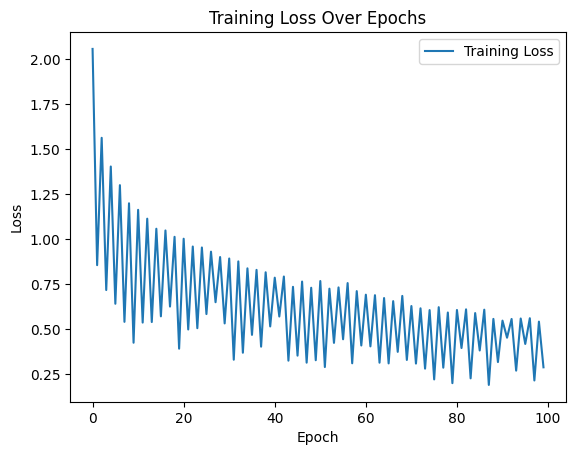

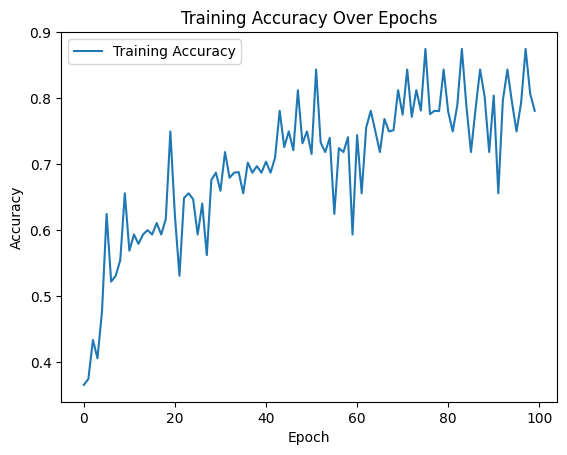

In [27]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Evaluate the model on your training data
train_loss, train_accuracy = model.evaluate(test_generator)

print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.7899 - loss: 0.6175
Training Loss: 0.5766
Training Accuracy: 0.7857


In [29]:
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
import io

# Load the pre-trained model
# model = load_model('insect_model.h5')  # Replace 'insect_model.h5' with the path to your trained model

class_names = {
    0: "Butterfly",
    1: "Dragonfly",
    2: "Grasshopper",
    3: "Ladybird",
    4: "Mosquito"
}

# Download the image from the URL
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTt73gGL37FH6HKRfhLNB5AiQI4bJVcLR4_Bg&usqp=CAU"
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Open the image from the content as a binary stream and convert it to RGB
    image = Image.open(io.BytesIO(response.content)).convert("RGB")

    # Resize the image to the model's input size (300x300)
    image = image.resize((300, 300))

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Preprocess the image
    image_array = image_array / 255.0

    # Make a prediction
    prediction = model.predict(np.expand_dims(image_array, axis=0))  # Expand dimensions for a single image

    # Get the predicted insect class index
    predicted_class_index = np.argmax(prediction)

    # Get the corresponding insect name from the dictionary
    predicted_insect_name = class_names[predicted_class_index]

    # Print both the class index and the insect name
    print('Predicted insect class:', predicted_class_index)
    print('Predicted insect name:', predicted_insect_name)
else:
    print('Failed to download the image. Status code:', response.status_code)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted insect class: 4
Predicted insect name: Mosquito
